## 6.4 Machine Learning Part 1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### 5. Observations
#### Bonus: performance improvement after evaluating individual dive sites
#### Conclusion

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Turn project folder path into a string
path = r'/Users/thomasradio/Documents/Jupyter/230808 Tom Radio Achievement 6 Project'

In [4]:
path

'/Users/thomasradio/Documents/Jupyter/230808 Tom Radio Achievement 6 Project'

In [5]:
pugetsound_tides_currents = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '6_4_pugetsound_tides_currents_lunar.pkl'))

In [6]:
pugetsound_tides_currents

,Dive_Site,Date,Day_of_Week,Time,Event,Current_Speed_(knots),Height (cm),Height (ft),Current_Station_Name,Current_Station_ID,Tide_Station_Name,Tide_Station_ID,Latitude,Longitude,Moon Illuminated,STATE_NAME
0,Alki,2024-01-01,Monday,0:24:00,ebb,0.5,NaN,NaN,HARBOR ISLAND WEST,PUG1507,NaN,NaN,47.588707,-122.380009,0.75,Washington
1,Alki,2024-01-01,Monday,1:34:00,Low,NaN,20.0,0.66,NaN,NaN,LOCKHEED SHIPYARD,9447110.0,47.588707,-122.380009,0.75,Washington
2,Alki,2024-01-01,Monday,4:00:00,slack,0.0,NaN,NaN,HARBOR ISLAND WEST,PUG1508,NaN,NaN,47.588707,-122.380009,0.75,Washington
3,Alki,2024-01-01,Monday,6:12:00,flood,0.1,NaN,NaN,HARBOR ISLAND WEST,PUG1509,NaN,NaN,47.588707,-122.380009,0.75,Washington
4,Alki,2024-01-01,Monday,8:36:00,slack,0.0,NaN,NaN,HARBOR ISLAND WEST,PUG1510,NaN,NaN,47.588707,-122.380009,0.75,Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16621,Tacoma Narrows,2024-12-31,Tuesday,14:36:00,flood,2.2,NaN,NaN,"THE NARROWS, NORTH",PUG4352,NaN,NaN,47.265336,-122.544439,0.00,Washington
16622,Tacoma Narrows,2024-12-31,Tuesday,16:18:00,High,NaN,355.0,11.65,NaN,NaN,TACOMA NARROWS BRIDGE,9446486.0,47.265336,-122.544439,0.00,Washington
16623,Tacoma Narrows,2024-12-31,Tuesday,16:54:00,slack,0.0,NaN,NaN,"THE NARROWS, NORTH",PUG4353,NaN,NaN,47.265336,-122.544439,0.00,Washington
16624,Tacoma Narrows,2024-12-31,Tuesday,20:48:00,ebb,5.0,NaN,NaN,"THE NARROWS, NORTH",PUG4354,NaN,NaN,47.265336,-122.544439,0.00,Washington


### 2. Data cleaning

In [7]:
# Select only the columns to keep
selected_columns = ['Dive_Site', 'Current_Speed_(knots)', 'Moon Illuminated']

In [8]:
# Create a new DataFrame with only the selected columns
selected_data = pugetsound_tides_currents[selected_columns]

In [9]:
selected_data

,Dive_Site,Current_Speed_(knots),Moon Illuminated
0,Alki,0.5,0.75
1,Alki,NaN,0.75
2,Alki,0.0,0.75
3,Alki,0.1,0.75
4,Alki,0.0,0.75
...,...,...,...
16621,Tacoma Narrows,2.2,0.00
16622,Tacoma Narrows,NaN,0.00
16623,Tacoma Narrows,0.0,0.00
16624,Tacoma Narrows,5.0,0.00


##### Missing values

In [10]:
# Check for missing values

selected_data.isnull().sum()

Dive_Site                   0
Current_Speed_(knots)    5626
Moon Illuminated            0
dtype: int64

In [11]:
# Remove rows with missing values in 'Current_Speed_(knots)'
selected_data = selected_data.dropna(subset=['Current_Speed_(knots)'])

In [12]:
# Check for missing values

selected_data.isnull().sum()

Dive_Site                0
Current_Speed_(knots)    0
Moon Illuminated         0
dtype: int64

In [13]:
selected_data

,Dive_Site,Current_Speed_(knots),Moon Illuminated
0,Alki,0.5,0.75
2,Alki,0.0,0.75
3,Alki,0.1,0.75
4,Alki,0.0,0.75
6,Alki,0.2,0.75
...,...,...,...
16618,Tacoma Narrows,2.5,0.00
16620,Tacoma Narrows,0.0,0.00
16621,Tacoma Narrows,2.2,0.00
16623,Tacoma Narrows,0.0,0.00


##### Extreme values checks

/var/folders/wy/62t22_pd525blsykm014z4tm0000gn/T/ipykernel_72750/3907862593.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(selected_data['Current_Speed_(knots)'], bins=25) # Shows extreme values


<Axes: xlabel='Current_Speed_(knots)', ylabel='Density'>

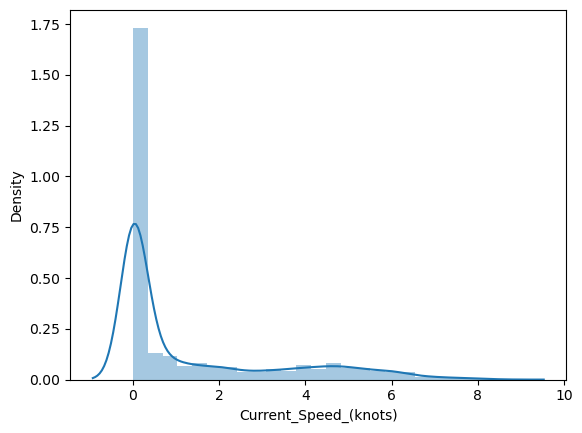

In [14]:
sns.distplot(selected_data['Current_Speed_(knots)'], bins=25) # Shows extreme values

In [15]:
selected_data['Current_Speed_(knots)'].mean() # Check the mean

1.2900727272727273

In [16]:
selected_data['Current_Speed_(knots)'].median() # Check the median

0.0

In [17]:
selected_data['Current_Speed_(knots)'].max() # Check the max

8.6

### Exclude irrelevant data

In [18]:
# Remove rows with "0" entries in the 'Current_Speed_(knots)' column
selected_data = selected_data[selected_data['Current_Speed_(knots)'] != 0.0]

In [19]:
selected_data['Current_Speed_(knots)'].min()

0.1

In [20]:
selected_data.head(10)

,Dive_Site,Current_Speed_(knots),Moon Illuminated
0,Alki,0.5,0.75
3,Alki,0.1,0.75
6,Alki,0.2,0.75
11,Alki,0.4,0.67
14,Alki,0.1,0.67
17,Alki,0.2,0.67
23,Alki,0.3,0.58
26,Alki,0.1,0.58
29,Alki,0.3,0.58
34,Alki,0.2,0.48


In [21]:
selected_data.tail(10)

,Dive_Site,Current_Speed_(knots),Moon Illuminated
16597,Tacoma Narrows,1.6,0.03
16600,Tacoma Narrows,4.6,0.03
16603,Tacoma Narrows,5.1,0.01
16606,Tacoma Narrows,2.3,0.01
16609,Tacoma Narrows,1.9,0.01
16612,Tacoma Narrows,4.8,0.01
16615,Tacoma Narrows,5.3,0.00
16618,Tacoma Narrows,2.5,0.00
16621,Tacoma Narrows,2.2,0.00
16624,Tacoma Narrows,5.0,0.00


In [22]:
selected_data.describe()

,Current_Speed_(knots),Moon Illuminated
count,5446.000000,5446.000000
mean,2.605729,0.492798
std,2.153240,0.354141
min,0.100000,0.000000
25%,0.600000,0.130000
50%,2.100000,0.480000
75%,4.500000,0.850000
max,8.600000,1.000000


#### I chose to eliminate all entries with a "0" value from the "Current_Speed_(knots)" column. These specific entries correspond to instances of slack tide, which occur approximately four times daily regardless of the moon's phase. Our primary focus is on investigating the impact of lunar phases on the highest observed current speed at each dive site. Inclusion of these "0" entries could potentially introduce bias to the dataset, as they do not contribute to the variability in current speed during non-slack tide periods. By removing these entries, we aim to ensure a more accurate examination of the influence of lunar phases on the maximum current speeds observed.


### 3. Data prep for regression analysis 

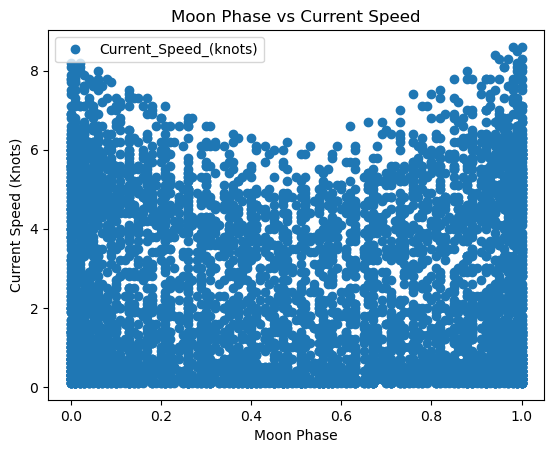

In [23]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

selected_data.plot(x = 'Moon Illuminated', y='Current_Speed_(knots)',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Moon Phase vs Current Speed')  
plt.xlabel('Moon Phase')  
plt.ylabel('Current Speed (Knots)')  
plt.show()

## Hypothesis:

### Underwater currents at each dive site will vary with the phases of the moon. Currents are expected to be strongest during full moon and new moon phases, while being weakest during intermediate phases.

In [24]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = selected_data['Moon Illuminated'].values.reshape(-1,1)
y = selected_data['Current_Speed_(knots)'].values.reshape(-1,1)

In [25]:
X

array([[0.75],
       [0.75],
       [0.75],
       ...,
       [0.  ],
       [0.  ],
       [0.  ]])

In [26]:
y

array([[0.5],
       [0.1],
       [0.2],
       ...,
       [2.5],
       [2.2],
       [5. ]])

In [27]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [28]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [29]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [30]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

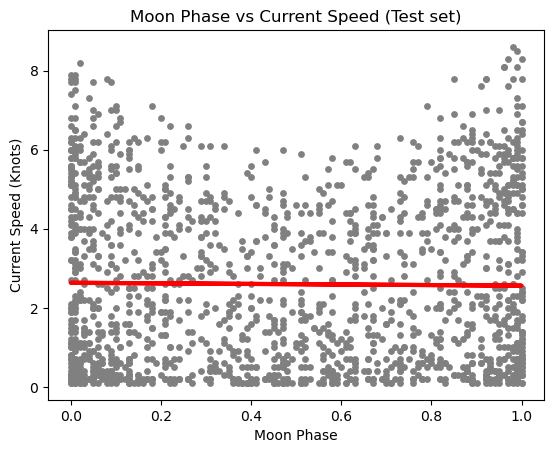

In [31]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Moon Phase vs Current Speed (Test set)')
plot_test.xlabel('Moon Phase')
plot_test.ylabel('Current Speed (Knots)')
plot_test.show()

In [32]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [33]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.0727215]]
Mean squared error:  4.601447017658061
R2 score:  -0.0010362562029697653


In [34]:
y_predicted

array([[2.62712691],
       [2.58494844],
       [2.61621869],
       ...,
       [2.56749528],
       [2.56385921],
       [2.62712691]])

In [35]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.3,2.627127
1,4.1,2.584948
2,1.0,2.616219
3,1.7,2.600947
4,0.6,2.568950
5,3.0,2.613310
6,0.9,2.630036
7,1.7,2.588585
8,0.6,2.560950
9,5.3,2.617673


##### Compare how the regression fits the training set

In [36]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [37]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [38]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.0727215]]
Mean squared error:  4.65138520654172
R2 score:  0.0001419559146529359


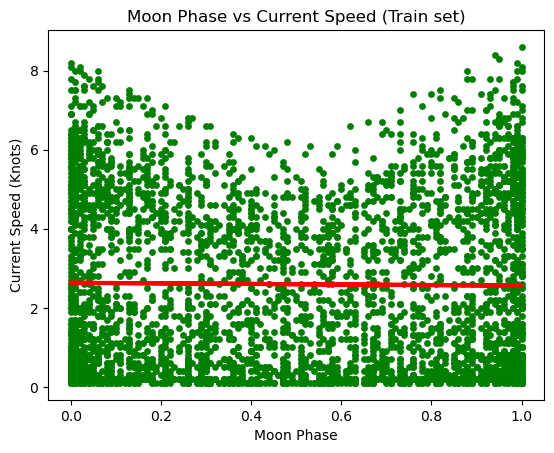

In [39]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Moon Phase vs Current Speed (Train set)')
plot_test.xlabel('Moon Phase')
plot_test.ylabel('Current Speed (Knots)')
plot_test.show()

### 5. Observations

#### Based on the results, the model's R2 score of approximately 0.001 indicates that the model's fit is not very strong, and the negative value suggests that the model may not be a good fit for the data. Here are the two key reasons why I believe the model's fit might not be strong in this case:

#### 1. Non-Linear Relationship: The relationship between "Moon Illuminated" and "Current_Speed_(knots)" is not linear. Instead, it follows a nonlinear pattern where the currents are strongest when the moon phase is closest to 0 or 1, and weakest in the middle. In such cases, a simple linear regression might not be the best model to capture the relationship accurately.

#### 2. Dive Site Variability: The currents' behavior is influenced differently at each dive site during different moon phases. Treating all the dive sites as one homogeneous dataset might not capture the variability and unique patterns present at each site.

#### Given these considerations, individual regression analyses for each dive site could potentially yield more meaningful and accurate results. By analyzing each dive site separately, we would be able to account for site-specific patterns and variations in the relationship between moon phase and current speed.

### Bonus: performance improvement after evaluating individual dive sites

In [40]:
# Get the unique dive site names
unique_dive_sites = selected_data['Dive_Site'].unique()

# Print the unique dive site names
print(unique_dive_sites)

['Alki' 'Deception Pass' 'Salt Creek' 'Tacoma Narrows']


In [41]:
# Create separate DataFrames for each dive site
alki_data = selected_data[selected_data['Dive_Site'] == 'Alki'].copy()
tacoma_data = selected_data[selected_data['Dive_Site'] == 'Tacoma Narrows'].copy()
deception_data = selected_data[selected_data['Dive_Site'] == 'Deception Pass'].copy()
saltcreek_data = selected_data[selected_data['Dive_Site'] == 'Salt Creek'].copy()

In [42]:
deception_data

,Dive_Site,Current_Speed_(knots),Moon Illuminated
4140,Deception Pass,4.0,0.75
4143,Deception Pass,5.3,0.75
4145,Deception Pass,2.9,0.75
4149,Deception Pass,3.9,0.75
4152,Deception Pass,3.5,0.67
...,...,...,...
8367,Deception Pass,7.7,0.01
8370,Deception Pass,6.9,0.00
8373,Deception Pass,5.7,0.00
8376,Deception Pass,3.2,0.00


In [43]:
alki_data

,Dive_Site,Current_Speed_(knots),Moon Illuminated
0,Alki,0.5,0.75
3,Alki,0.1,0.75
6,Alki,0.2,0.75
11,Alki,0.4,0.67
14,Alki,0.1,0.67
...,...,...,...
4124,Alki,0.7,0.01
4127,Alki,0.3,0.00
4130,Alki,0.2,0.00
4133,Alki,0.2,0.00


In [44]:
tacoma_data

,Dive_Site,Current_Speed_(knots),Moon Illuminated
12385,Tacoma Narrows,4.5,0.75
12388,Tacoma Narrows,3.0,0.75
12391,Tacoma Narrows,1.9,0.75
12394,Tacoma Narrows,3.5,0.67
12397,Tacoma Narrows,4.3,0.67
...,...,...,...
16612,Tacoma Narrows,4.8,0.01
16615,Tacoma Narrows,5.3,0.00
16618,Tacoma Narrows,2.5,0.00
16621,Tacoma Narrows,2.2,0.00


In [45]:
saltcreek_data

,Dive_Site,Current_Speed_(knots),Moon Illuminated
8383,Salt Creek,0.7,0.75
8386,Salt Creek,1.0,0.75
8389,Salt Creek,0.1,0.75
8391,Salt Creek,0.8,0.67
8393,Salt Creek,0.4,0.67
...,...,...,...
12369,Salt Creek,2.0,0.01
12372,Salt Creek,1.5,0.00
12376,Salt Creek,1.1,0.00
12379,Salt Creek,0.1,0.00


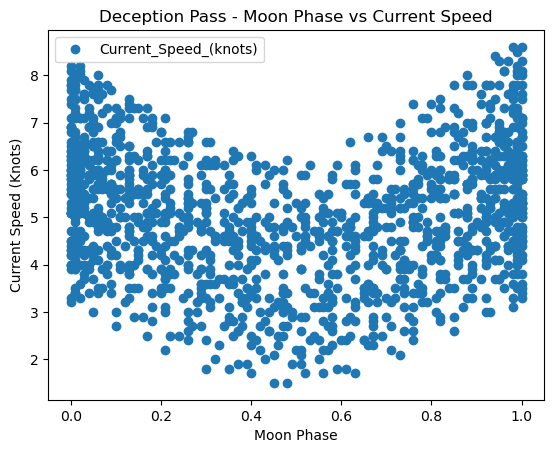

In [46]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

deception_data.plot(x = 'Moon Illuminated', y='Current_Speed_(knots)',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Deception Pass - Moon Phase vs Current Speed')  
plt.xlabel('Moon Phase')  
plt.ylabel('Current Speed (Knots)')  
plt.show()

In [47]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = deception_data['Moon Illuminated'].values.reshape(-1,1)
y = deception_data['Current_Speed_(knots)'].values.reshape(-1,1)

In [48]:
X

array([[0.75],
       [0.75],
       [0.75],
       ...,
       [0.  ],
       [0.  ],
       [0.  ]])

In [49]:
y

array([[4. ],
       [5.3],
       [2.9],
       ...,
       [5.7],
       [3.2],
       [7.5]])

In [50]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression analysis

In [51]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [52]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [53]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

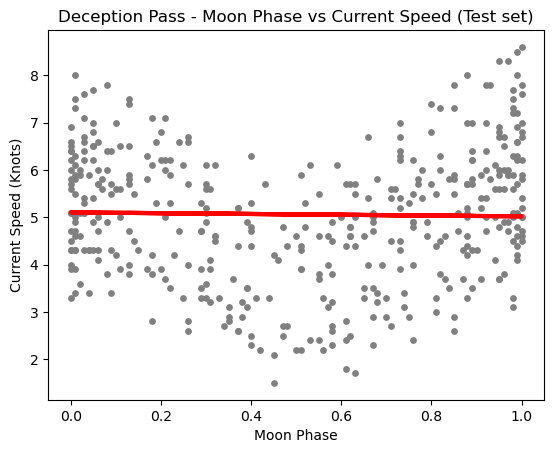

In [54]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Deception Pass - Moon Phase vs Current Speed (Test set)')
plot_test.xlabel('Moon Phase')
plot_test.ylabel('Current Speed (Knots)')
plot_test.show()

In [55]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [56]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.08432074]]
Mean squared error:  1.9904508649364645
R2 score:  -0.0035201620546367884


In [57]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.8,5.092949
1,3.7,5.086204
2,1.7,5.050789
3,3.9,5.103068
4,3.8,5.022963
5,4.9,5.022120
6,5.8,5.103068
7,4.3,5.060907
8,5.5,5.039827
9,1.5,5.065967


### Conclusion

#### Model Summary Statistics for All Dive Sites:

    Slope: -0.0727215
    Mean squared error: 4.601447017658061
    R2 score: -0.0010362562029697653

#### Model Summary Statistics for "Deception Pass" Only:

    Slope: -0.08432074
    Mean squared error: 1.9904508649364645
    R2 score: -0.0035201620546367884
    
#### For the model considering all dive sites, the relationship between "Moon Illuminated" and "Current_Speed_(knots)" is summarized by a slope of approximately -0.0727. However, the low R2 score of -0.0010 suggests that this linear regression model poorly explains the variability in the data.

#### In contrast, when focusing exclusively on the "Deception Pass" dive site, the model presents a slightly steeper slope of -0.0843. Despite the improved slope, the R2 score remains notably low at -0.0035, suggesting that the model's fit is still poor. The mean squared error of 1.9905 is lower than the overall model but is still substantial.

#### These results collectively indicate that both models have limited predictive power and fail to accurately capture the underlying relationship between moon phase and current speed for the specified dive sites. The negative R2 scores suggest that the models might be performing even worse than a horizontal line.

#### Upon careful consideration, it's evident that moon phase indeed plays a significant role in influencing current speed at these dive sites. However, the linear regression models, due to their inability to capture non-linear relationships, weren't able to fully represent this impact. The non-linear nature of the relationship between moon phase and current speed highlights the need for alternative modeling approaches that can better capture these dynamics. Incorporating advanced techniques that account for non-linearity could lead to more accurate insights into how moon phase affects underwater currents at the dive sites.